今回から確率論に入っていきます。このノートでは確率、条件付き確率、確率分布、期待値・分散など確率論の基本的な語彙の確認をします。

# 確率の解釈
**事象(event)** $A$ の生じる**確率(probability)**を $P(\mathbf{A})$ と表記する事にします。そもそも事象とは一体何であるか？という問題もありますが、とりあえずは素朴に「生じたか生じなかったかを明確に判断できる現象」としておきましょう。例えば「あるサイコロを振って1の目が出る」という現象は事象と考えて良いでしょう。

さて、では「あるサイコロを振って1の目が出る確率」とは何でしょうか？これは哲学的な問題であり、明確な答えはありません。
ここでは、**頻度論(frequentism)**と**主観論(subjectivism)**について紹介します。

## 頻度論
確率の頻度論的解釈とは「数を数える」事に基づく確率の解釈です。例えば、高校数学では以下のような考え方をしました

> サイコロを振って出る目は6通りあり、それらは同様に確からしい為、1の目が出る確率は 1/6 である

こうして求まる確率は **組合せ論的確率(conbinatorial probability)** と呼ばれます。実際の統計の問題では「同様に確からしい」という事を仮定できることがめったにない為、この考え方はあまり使われません。

その代わりに用いられるのは **統計的確率(statistical probability)** という考え方です。

----
【統計的確率】

互いに影響を及ぼさない独立な試行を $n$ 回行った時に、事象 $A$ が $k$ 回生じたとする。ここで $n\rightarrow \infty$ とした時に $k/n$ がある定数 $p$ に近づいていくならば， $p$ を 事象 $A$ の生じる統計的確率と言う。

----

サイコロを振って1の目が出る統計的確率を調べてみましょう。今は本物のサイコロを振る事は出来ないので、擬似乱数で代用してみます。

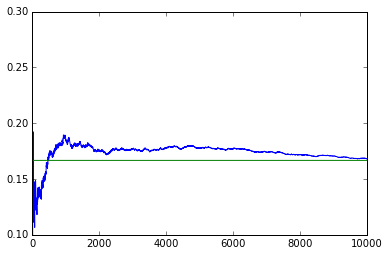

In [2]:
NMAX = 10000
rate = []
k = 0
for n in range(1, NMAX+1):
    v = random.randint(1, 6+1) # サイコロを振る
    if v == 1:
        k += 1 # 1が出た回数を数える
    rate.append(float(k)/n)
ylim(0.1, 0.3)
plot(rate)
plot(ones(NMAX)/6)

緑の線は $1/6$ です。最初は $1/6$ から大きくずれていますが回数を増やしていくと, この値に近づいていく事が観察できると思います。

## 主観論
頻度論の良い所はその客観性です。つまり、誰が計算しても $P(A)$ は同じ値になります(実際には無限回の試行は出来ませんが)。
一方で、頻度論的な解釈が困難・不可能である問題も沢山あります。例えば、Aさんがある殺人事件の犯人である確率を考えたいとしましょう。Aさんが犯人であるか否かは既に確定した事柄ですから、試行などすることは出来ません。他にも例えば、Bさんにある商品の広告を見せたとして、それをクリックしてくれる確率を考えたいとしましょう。頻度論的にこの確率を考えるならば、Bさんに何回も(何千回も)同じ広告を見せるという試行が必要です。しかし、そんなことはまず無理です。

**主観論(subjectivism)**と呼ばれる確率解釈では、$P(A)$を以下のように解釈します。
この解釈は数学者**トーマス・ベイズ(Thomas Bayes)**の名を取って**ベイズ論(Bayesian)**とも呼ばれます。

----
【主観的確率(ベイズ確率)】

事象 $A$ の生じる確率 $P(A)$ とは、$A$ が生じるという事に対する**確信の度合い**を数量化したものである。

----

例えば、ある殺人事件について $P(\text{Aが犯人}) = 0.9$ ならばAが犯人だという事をかなり強く確信しているという事になります。 $P(\text{Aが犯人})=0.6$ ならば、犯人かそうでないかと言われれば犯人であると思うという感じでしょうか。 $P(\text{Aが犯人}) = 0.5$ ならば、犯人かそうでないか全く分からないという事です。

主観的な確率(ベイズ確率)はそれを考える主体によって値が変わりうるという事になります。この客観性の低さから科学的でないと批判される事も多いです。

一方で、「ベイズ論は人間の考え方に近い」という意見もあります。例えば、コインを投げて表が出る確率が1/2だと主張する時、私達は実際には試行を行って頻度を数えたわけではありません。「表が出るか裏が出るか全く予想出来ないから$1/2$」という方が実際の私達の考え方に近いでしょう。
また、**ベイズ確率は新しい情報を得る度に変化する**という点も重要です。先ほどの例で言えば新たな証拠を得る度にAが犯人である確率は増えたり減ったりするでしょう。

頻度論的な考え方と主観論的な考え方の違いを次の簡単な問題で考えてみましょう。

> 確率1/2で表が出るコインを10回投げたら全て表が出た。次に投げて表が出る確率は？

頻度論的では「10回全て表」という事実は意味を持ちません。表が出る確率はやはり1/2で不変です。
主観論的では「10回全て表」という結果を受けて「確率1/2」という当初の信念を改める事を許します。「実は表が出る確率の方が大きいのではないか？」と考える事が可能です。ここで、ベイズ確率論では合理的な信念の改訂方法が与えられるという事が重要です。例えば「10回も表が出続けたのだから、次はさすがに裏が出やすいだろう」という考え方は非合理的である事が示されます。詳しくは後で説明します。

# 公理的確率論

確率の解釈の問題は哲学的な問題です。数学的に確率を厳密に取り扱う場合には「確率とは何であるか？」という事は一旦忘れて、「確率と呼ばれる何かがあったとして、それはどのような性質を満たすべきか？」という事を抽象的に記述する事から出発します。これは**公理的確率論(axiomatic probability theory)**と呼ばれます。厳密に書くと非常に長くなるので必要最小限の事柄だけ書いていきます。

## 確率空間
まず**標本空間(sample space)**と呼ばれる集合 $\Omega$ を考えます。$\Omega$ の要素を**標本(sample)**と呼びます。
続いて**事象空間(event space)**と呼ばれる集合 $\mathcal{F}$ を考えます。$\mathcal{F}$ の個々の元は $\Omega$ の部分集合です。これを**事象(event)**と呼びます。事象 $A,B\in\mathcal{F}$ が交わらない($A\cap B=\emptyset$)時、これらは**排反(exclusive)**であると言います。
事象$A$の補集合$A^c = \Omega-A$ を**余事象(complement event)**と呼びます。これは「$A$が起こらない」という事象です。
$A,B$ の和集合 $A\cup B$ を**和事象(sum event)**と呼びます。これは「$A$または$B$が起こる」という事象です。
$A,B$ の積集合 $A\cap B$ を**積事象(product event)**と呼びます。これは「$A$も$B$も起こる」という事象です。
$\mathcal{F}$ は必ず $\emptyset$ と $\Omega$ を含む必要があります。これらを**空事象(empty event)**及び**全事象(whole event)**と呼びま
す。それ以上小さな事象が空事象しかないような事象を**根元事象(elementary event)**と呼びます。($\mathcal{F}$ は$\sigma$-完全加法族というものでなければなりませんが、ここでは省略します。)

**確率測度(probability measure)**(もしくは単に確率 $P$) は各事象 $A\in\mathcal{F}$ に $0$ 以上 $1$ 以下の実数値 $P(A)$ を割り当てる関数 $P:\mathcal{F}\rightarrow[0,1]$ で以下の条件を満たすものです。

1. $P(\Omega)= 1$
2. 【完全加法性】$A_1,A_2,\ldots\in\mathcal{F}$ が排反の時 $P\left(A_1\cup A_2\cup\cdots\right) = P(A_1)+P(A_2)+\cdots $

以上 $(\Omega,\mathcal{F},P)$ の3つで１つの確率的な現象が記述されます。これ**確率空間(probability space)**と呼びます。

### 例
サイコロの出目のモデルを作ってみましょう。この場合の標本空間は例えば$ \Omega = \{1,2,3,4,5,6\}$ となります。

事象空間は$\mathcal{F}=\{\emptyset,\{1\},\{2\},\{3\},\{4\},\{5\},\{6\},\{1,2\},\{1,3\},\ldots,\{1,2,3,4,5,6\}\}$ となります。

確率 $P$ は
$$P(\{1\}) = P(\{2\}) = \cdots = P(\{6\}) = \frac{1}{6}$$
とすれば後は自動的に定まります。例えば2以下の目が出る確率は完全加法性を使って

$$P(\{1,2\})=P(\{1\}\cup\{2\})=P(\{1\})+P(\{2\})=\frac{1}{6}+\frac{1}{6}=\frac{1}{3}$$

と計算されます。

### 確率測度の性質

$P(\Omega)=1$ と完全加法性から以下のような性質が導かれます。証明は省略しますのでやってみてください。

1. $P(A^c) = 1-P(A)$
2. $P(A\cup B) = P(A) + P(B) - P(A\cap B)$
3. $A,B$ が排反の時 $P(A\cup B) = P(A) + P(B)$

## 確率分布
サイコロの出目とその確率を表にすると以下のようになります。

$$\begin{array}{|c|c|c|c|c|c|c|} \hline
\text{出目} & 1 & 2 & 3 & 4 & 5 & 6 \\ \hline
\text{確率} & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 \\ \hline
\end{array}$$

これをグラフにしてみると次のようになります。

<Container object of 6 artists>

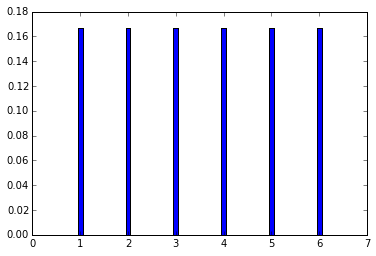

In [3]:
x = array([1,2,3,4,5,6])
p = ones(6)/6
bar(x, p, width=0.1, align='center')

次はサイコロを二つ振った出目と確率の関係を考えてみましょう。

$$\begin{array}{|c|c|c|c|c|c|c|c|c|c|c|c|}\hline
\text{出目の和} & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 & 11 & 12 \\ \hline
\text{確率} & 1/36 & 2/36 & 3/36 & 4/36 & 5/36 & 6/36 & 5/36 & 4/36 & 3/36 & 2/36 & 1/36 \\ \hline
\end{array}$$

対応するグラフは下のようになります。

<Container object of 11 artists>

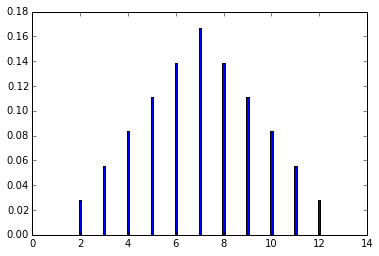

In [4]:
x = array([2,3,4,5,6,7,8,9,10,11,12])
p = array([1,2,3,4,5,6,5,4,3,2,1], dtype=float)/36
bar(x, p, width=0.1, align='center')

このように**標本が実数値である場合**には、確率 $P$ を $x$ 軸上の分布として捉える事が出来ます。同様に標本が $xy$ 平面内の点 $(x,y)$ であるような分布， $xyz$ 空間内の点 $(x,y,z)$ である様な分布などを考える事が出来ます。一般に標本空間が $\mathbb{R}^n$ である様な確率速度 $P$ を $n$ 次元**確率分布(probability distribution)**と呼び、標本を表す変数 $\mathbf{X}$ を**確率変数(probability variable)**と呼びます。

今のサイコロの例のように飛び飛びの一点でのみ $0$ 以外の値を取るような確率分布を**離散確率分布(discrete probability distribution)**と呼びます。

### 連続確率分布
離散的ではない確率分布を**連続的確率分布(continuous probability distribution)**と呼びます。
連続的確率分布における確率は一点毎ではなく、 $P(a \leq X \leq b)$ などのように区間に対して与えます。標本が無限個存在する為、特定の一点が選ばれる確率は $0$ であるからです。確率変数 $X$ に対して関数

$$ F(x) = P(X \leq x) $$

を**累積分布関数(cumulative distribution function)**と呼びます。これが与えられれば

$$ P(a\leq X \leq b) = P(X\leq b) - P(X\leq a) = F(b) - F(a) $$

によって任意の区間の確率を計算する事が出来ます。また累積分布関数の導関数

$$ \pi(x) = \frac{\mathrm{d}}{\mathrm{d}x}F(x) $$

を**確率密度関数(probability density function)** と呼びます。つまり

$$ F(x) = \int_{-\infty}^x \pi(x)\mathrm{d} x $$

ですので

$$\color{red}{ P(a\leq X\leq b) = \int_a^b \pi(x)\mathrm{d} x } $$

となります。つまり区間 $[a,b]$ において $y=\pi(x)$ と $x$ 軸で囲まれる区間の面積が $P(a\leq X\leq b)$ と等しくなります。

### 例
例えば区間 $[0,1]$ から無作為に一点を選ぶという試行を考えましょう。この時、任意の点 $x=a$ に対して $P(x=a)=0$ です。例えば無限個ある点の中から $x=\pi=3.141592\cdots$ がピッタリ選ばれる確率は $0$ です。従って連続分布では一点毎に考えても意味がありません。一方、$[0,1]$ 内にある区間 $[a,b]$ 内の点が選ばれる確率はその長さ $b-a$ に比例します。 $P(0\leq x\leq 1)=1$ であることに注意すれば

$$ P(a\leq x\leq b) = b-a \qquad (0\leq a\leq b\leq 1)$$

となります。また確率密度関数は

$$ \pi(x) = \left\{\begin{array}{ll}
0 & (x < 0\text{または}1 < x) \\
1 & (0\leq x \leq 1) \\
\end{array}\right. $$
となります。

In [ ]:
x = linspace(-1, 2)
p = 0*x
p[logical_and(0 <= x, x <= 1)] = 1
ylim(0, 2)
plot(x, p)

## 変数変換

確率変数を他の確率変数に変換する方法を説明します。

確率変数 $X$ の密度関数が $\pi_X(x)$, 累積分布関数が $F_X(x)$ 、確率変数 $Y$ の密度関数が $\pi_Y(y)$, 累積分布関数が $F_Y(y)$ であるとします。ここで $X,Y$ の間に $X=g(Y)$ の関係があるとしましょう。非常に狭い区間では $g$ は単調増加か単調減少であると考えて良いので

$$ P(y \leq Y \leq y+\mathrm{d}y) = P(y \leq g^{-1}(X)\leq y+\mathrm{d}y) = P(g(y)\leq X \leq g(y+\mathrm{d}y))\text{または}P(g(y+\mathrm{d}y)\leq X\leq g(y))$$

が成り立ちます。累積分布関数を用いて書き直せば

$$ F_Y(y+\mathrm{d}x)-F_Y(y) = |F_X(g(y+\mathrm{d}y))-F_X(g(y))|$$

つまり

$$ \frac{F_Y(y+\mathrm{d}y)-F_Y(y)}{\mathrm{d} y} = \left|\frac{F_X(g(y+\mathrm{d}y))-F_X(g(y))}{\mathrm{d}y}\right|$$

ですので

$$ F_Y'(y) = |g'(y)F_X'(g(y))| $$

つまり

$$ \pi_Y(y) = |g'(y)|\pi_x(g(y))\qquad(\because \pi_x(g(y)) \geq 0)$$

によって確率密度関数の変換が出来ます。多変数の場合も同様です。

----
【変数変換】

確率変数 $X,Y$ の間に $X=g(Y)$ の関係がある時、密度関数について
$$\pi_Y(y) = |g'(y)|\pi_X(g(y))$$
が成り立つ。

$n$ 次元確率変数 $\mathbf{X},\mathbf{Y}$ の間に $\mathbf{X}=\mathbf{g}(\mathbf{Y})$ の関係がある時、密度関数について
$$\pi_{\mathbf{Y}}(\mathbf{y}) = |\mathrm{def}\mathrm{J}_{\mathbf{g}}(\mathbf{y})|\pi_{\mathbf{X}}(\mathbf{g}(\mathbf{Y}))$$
が成り立つ。但し $\mathrm{J}_{\mathbf{g}}$ は $g$ の**ヤコビ行列(Jacobian matrix)**であり

$$ \mathrm{J}_{\mathbf{g}}(\mathbf{y}) \stackrel{\mathrm{def}}{=} \begin{pmatrix}
\frac{\partial g_1}{\partial y_1} & \frac{\partial g_1}{\partial y_2} & \cdots & \frac{\partial g_1}{\partial y_n} \\
\frac{\partial g_2}{\partial y_1} & \frac{\partial g_2}{\partial y_2} & \cdots & \frac{\partial g_2}{\partial y_n} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial g_n}{\partial y_1} & \frac{\partial g_n}{\partial y_2} & \cdots & \frac{\partial g_n}{\partial y_n} \\
\end{pmatrix} $$

----

### 例
確率変数 $X$ を 区間 $[0,1]$ からのランダムな実数とする。この時$Y=X^2$ はどのような分布に従うでしょうか？

先ほどやったように $X$ の密度関数は
$$\pi_X(x) =  \left\{\begin{array}{ll}
0 & (x < 0\text{または}1 < x) \\
1 & (0\leq x \leq 1) \\
\end{array}\right. $$
です。ここで $X=\sqrt{Y}$ の関係があるので

$$\pi_Y(y) = \left|\frac{1}{2\sqrt{y}}\right|\pi_X(\sqrt{y}) = 
 \left\{\begin{array}{ll}
0 & (\sqrt{y} < 0\text{または}1 < \sqrt{y}) \\
\frac{1}{2\sqrt{y}} & (0\leq \sqrt{y} \leq 1) \\
\end{array}\right. =
 \left\{\begin{array}{ll}
0 & (y > 1) \\
\frac{1}{2\sqrt{y}} & (0\leq y \leq 1) \\
\end{array}\right. $$
が求める密度関数です。以下で実験してみましょう。

-c:7: RuntimeWarning: divide by zero encountered in true_divide


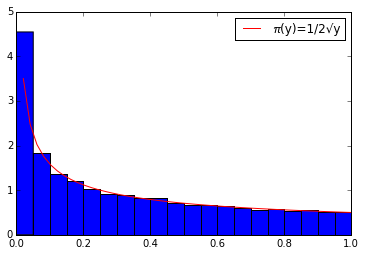

In [6]:
N = 10000
X = random.uniform(0, 1, N)  # 区間[0,1]からNサンプル取る
Y = X**2 # 値を変換する
hist(Y, bins=20, normed=True) #Yの分布(ヒストグラム)を作成

x = linspace(0, 1)
plot(x, 1/(2*sqrt(x)), color='red', label=u'π(y)=1/2√y')
legend()


## 同時分布、周辺化
事象 $A,B$ に対して $P(A\cap B)$ を $A,B$ の**同時確率(joint probability)**と呼び $P(A,B)$ と書きます。$A_1,A_2,\ldots,A_n$ に対する同時確率 $P(A_1,A_2,\ldots,A_n)$ も同様に定義されます。

$n$ 次元の確率変数 $\mathbf{X}=(X_1,X_2,\ldots,X_n)^T$ の従う確率分布を $X_1,X_2,\ldots,X_n$ の**同時分布(joint distribution)**と呼びます。同時分布の確率測度をある変数について足し合わせる事を**周辺化(marginalization)**と呼びます。

### 例
以下のような確率分布を考えます。
$$ \begin{array}{|c|c|c|c|}\hline
    & X=0  & X=1 & X=2 \\ \hline
Y=0 & 2/12 & 3/12 & 2/12 \\ \hline
Y=1 & 3/12 & 1/12 & 1/12 \\ \hline
\end{array}$$
これを $Y$ について足し合わせる($Y$ について周辺化する)と以下のように $X$ の確率分布が得られます。
$$ \begin{array}{|c|c|c|}\hline
X=0  & X=1 & X=2 \\ \hline
5/12 & 4/12 & 3/12 \\ \hline
\end{array}$$
同様に $X$ について周辺化すると $Y$ の確率分布が得られます。
$$ \begin{array}{|c||c|c|c|}\hline
Y=0 & 7/12 \\ \hline
Y=1 & 5/12 \\ \hline
\end{array}$$


### 例
以下の密度関数で表される連続分布を考えましょう。後の回に説明しますが、これはディリクレ分布と呼ばれるものの１つです。

$$\pi(x, y) = 360xy^2(1-x-y) $$

但し、$x,y\geq 0, x+y\leq 1$ 以外での密度は $0$ です。これを $y$ について周辺化するということは $y$ について積分するという事です。

$$\pi(x) = \int_0^{1-x}360xy^2(1-x-y)\mathrm{d} y = 30x(1-x)^4$$

同様に $x$ ついて周辺化すると以下のようになります。

$$\pi(y) = \int_0^{1-x}360xy^2(1-x-y)\mathrm{d}x = 60y^2(1-y)^3$$

この様子を図示してみると下のようになります。

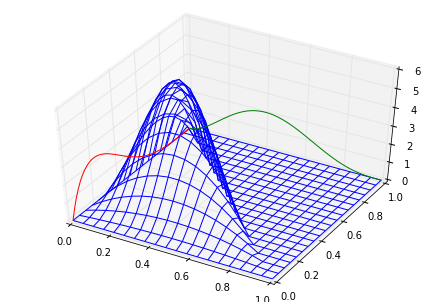

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = Axes3D(fig)
X, Y = meshgrid(linspace(0, 1, 20), linspace(0, 1, 20))
xlim(0, 1)
ylim(0, 1)
Z = 360*X*Y**2*(1-X-Y)
Z[X+Y>1]=0
ax.plot_wireframe(X, Y, Z)

x = linspace(0, 1)
y = 30*x*(1-x)**4
ax.plot(x, y, zs=0, zdir='x', c='red')

x = linspace(0, 1)
y = 60*x**2*(1-x)**3
ax.plot(x, y, zs=1, zdir='y', c='green')
ax.view_init(elev=45)

ちなみに、今の様な積分計算は[Maxima](http://maxima.sourceforge.net/)などの数式処理システムに行わせる事が出来ますので、試してみてください。Pythonにも[SymPy](http://sympy.org/en/index.html)というライブラリが存在します。以下は

$$\pi(x) = \int_0^{1-x}360xy^2(1-x-y)\mathrm{d} y = 30x(1-x)^4$$

の計算をSymPyでやった例です。

In [2]:
import  sympy
x = sympy.Symbol('x')
y = sympy.Symbol('y')
pxy = 360 * x *y**2 * (1-x-y) # π(x,y)
px = sympy.integrate(pxy, (y, 0, 1-x)) # yについて積分
sympy.factor(px) # 結果を因数分解して表示

30*x*(x - 1)**4

## 条件付き確率・条件付き分布

事象 $A,B$ に対して $P(A)>0$ の時

$$P(B|A) \stackrel{\mathrm{def}}{=} \frac{P(A,B)}{P(A)}$$

を $A$ が与えられた時の $B$ の**条件付き確率(conditional probability)**と呼びます。

### 例
サイコロの目が奇数だと分かっている時に、それが $4$ 以上である確率を求めましょう。まず
$$P(\text{奇数}) = \frac{1}{2}$$
です。また、
$$P(\text{奇数},\text{4以上}) = \frac{1}{6}$$
です。従って
$$P(\text{4以上}|\text{奇数}) = \frac{1/6}{1/2} = \frac{1}{3}$$
となります。

### 例
先ほどの連続分布$\pi(x, y) = 360xy^2(1-x-y) $に対して条件付き分布 $\pi(x|y=1/2)$ を求めてみましょう。まず
$$\pi(x, y=1/2) = 360x\left(\frac{1}{2}\right)^2\left(1-x-\frac{1}{2}\right) = 45x(1-2x)$$
です。また、$\pi(y) = 60y^2(1-y)^3$ だったので
$$\pi(y=1/2) = 60\left(\frac{1}{2}\right)^2\left(1-\frac{1}{2}\right)^3 = \frac{15}{8}$$
です。従って

$$\pi(x|y=1/2) = \frac{\pi(x, y=1/2)}{\pi(y=1/2)} = 24x(1-2x)$$

となります。 $x+y\leq 1$ なので $x$ の動く範囲は $[0,1/2]$ です。

## 独立性・乗法定理
条件付き確率・条件付き分布の公式より

$$ P(A,B) = P(A)P(B|A) $$

や

$$ \pi(x,y)=\pi(y)\pi(x|y)$$

などが成り立ちます。これを確率・確率分布の**乗法定理(multiplication theorem)**と呼びます。
ここで

$$ P(A,B) = P(A)P(B) $$

が成り立つ時、事象 $A,B$ は**独立(independent)**であると言います。独立でない事を**従属(dependent)**であると言います。別の式で表せば$A,B$ が独立であるとは $P(B)=P(B|A)$ が成り立つ事です。つまり、$A$が生じるということが分かっても、$B$が生じる確率に何の影響も及ぼさないという事です。同様に確率変数に対する独立性も定義されます。

$X_1,\ldots,X_n$ が同一な分布に従う独立な確率変数であることを**独立同分布(independent and identically distributed)**であると呼び、「$X_1,\ldots,X_n$ がi.i.d.の時」とか「$X_1,\ldots,X_n\stackrel{\text{i.i.d.}}{\sim}P$の時」などと書きます。

### ベイズの定理

確率の乗法定理より，事象 $A,B$ に対して $P(A)>0,P(B)>0$ の時

$$ P(A)P(B|A) = P(B)P(A|B) \quad(=P(A,B))$$

が成り立ちます。従って

$$\color{red}{ P(B|A) = \frac{P(A|B)}{P(A)} P(B) } $$

が成り立ちます。これを**ベイズの定理(Bayes's theorem)**と言います。これは公理的確率論の定理であり確率の解釈に寄らず成立するのですが、主観論の立場での解釈が重要です。

$P(B)$ は $A$ について何も知らない状況での $B$ の起こる確率であり、**事前確率(prior probability)**と呼ばれます。一方 $P(B|A)$ は $A$ が生じたという事を知った上での $B$ の起こる確率であり、**事後確率(posterior probability)**と呼ばれます。ベイズの定理は**新たな知識を得る事による信念の改訂**の法則を表していると考える事が出来ます。

### 例
1000人に1人の割合で発症する癌になっている確率 $P(\text{ガン})$ を考えましょう。何も知らない状態での事前確率は $P(\text{ガン})=0.001$ となります。
ここで、99%の正確さの検診を受けて陽性と判定された時の事後確率 $P(\text{ガン}|\text{陽性})$ を求めましょう。まず

$$ P(\text{陽性}|\text{ガン}) = 0.99\qquad(\text{99%正確}) $$

です。また, 陽性判定が出るのは「ガンを発症しており診断が正しい場合」と「ガンを発症していないのに診断が間違っている場合」の２通りですから

$$ P(\text{陽性}) = P(\text{陽性},\text{ガン}) + P(\text{陽性},\text{ガンでない}) = P(\text{陽性}|\text{ガン})P(\text{ガン}) + P(\text{陽性}|\text{ガンでない})P(\text{ガンでない}) = 0.99\times 0.001 + 0.01\times 0.999 = 0.01098$$

です。従って、ベイズの定理より求める事後確率は

$$P(\text{ガン}|\text{陽性}) = \frac{P(\text{陽性}|\text{ガン})}{P(\text{陽性})}P(\text{ガン}) = \frac{0.99}{0.01098}\times 0.001 = 0.09$$

となります。つまり、診断で陽性が出た事で癌である確率が0.1%から9%に上昇したという事になります。

確率分布に密度関数に対しても同様に

$$\color{red}{ \pi(\mathbf{x}|\mathbf{y}) = \frac{\pi(\mathbf{y}|\mathbf{x})}{\pi(\mathbf{y})}\pi(\mathbf{x}) }$$

という等式が成立し，$\pi(\mathbf{x})$ を**事前分布(prior distribution)**、$\pi(\mathbf{x}|\mathbf{y})$ を**事後分布(posterior distribution)**と呼びます。分母の $\pi(\mathbf{y})$ は $\mathbf{x}$ によらない定数なのでもっと単純に

$$\color{red}{ \pi(\mathbf{x}|\mathbf{y})\propto \pi(\mathbf{y}|\mathbf{x})\pi(\mathbf{x}) }$$

と書くことが出来ます。比例定数は確率の和が1であるという事から計算する事が出来、具体的に書いてみれば

$$\color{red}{ \pi(\mathbf{x}|\mathbf{y}) = \frac{\pi(\mathbf{y}|\mathbf{x})\pi(\mathbf{x})}{\int\pi(\mathbf{y}|\mathbf{x})\pi(\mathbf{x})\mathrm{d}\mathbf{x}} }$$

となります。

## 期待値・分散・標準偏差
確率分布の特徴を表す各種数値を**統計量(statistics)**と呼びます。

----
【期待値】

$\mathbf{X}=\mathbf{x}_1,\mathbf{x}_2,\ldots,\mathbf{x}_n$ のいずれかの値を取る離散的確率分布と関数 $f(\mathbf{X})$に対して
$$\mathrm{E}[f(\mathbf{X})] \stackrel{\mathrm{def}}{=} \sum_{i=1}^n f(\mathbf{x}_i)P(\mathbf{X}=\mathbf{x}_i)$$
を $f(\mathbf{X})$ の**期待値(expected value)**と呼ぶ。

確率密度関数 $\pi(\mathbf{x})$ で表される連続的確率分布と関数 $f(\mathbf{X})$ に対しては
$$\mathrm{E}[f(\mathbf{X})] \stackrel{\mathrm{def}}{=} \int f(\mathbf{x})\pi(\mathbf{x})\mathrm{d}\mathbf{x}$$
を $f(\mathbf{X})$ の期待値と呼ぶ。積分は$\mathbf{x}$ の変域全体について取る。

----

$\mathrm{E}[\mathbf{X}]$ の事を特に $\mathbf{X}$ の**平均(mean)**と呼びます。また $\mathrm{E}[X^n]$ は分布の$n$次の**モーメント(moment)**と呼ばれます。

### 例

サイコロの出目の分布
$$\begin{array}{|c|c|c|c|c|c|c|} \hline
X & 1 & 2 & 3 & 4 & 5 & 6 \\ \hline
P(X) & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 \\ \hline
\end{array}$$
に対して $\mathrm{E}[X], \mathrm{E}[X^2], \mathrm{E}[X^3]$ を求めてみましょう。

In [9]:
x = array([1,2,3,4,5,6])
p = ones(6)/6
EX  = sum(x * p)
EX2 = sum(x**2 * p)
EX3 = sum(x**3 * p)
print (EX)
print (EX2)
print (EX3)

3.5
15.1666666667
73.5


### 例
以下の連続分布に対して $\mathrm{E}[X],\mathrm{E}[X^2], \mathrm{E}[X^3]$ を求めてみましょう。
$$ \pi(x) = \left\{\begin{array}{ll}
0 & (x < 0\text{または}1 < x) \\
1 & (0\leq x \leq 1) \\
\end{array}\right. $$

$$ \mathrm{E}[X] = \int_{-\infty}^{\infty}x\pi(x)\mathrm{d}x = \int_0^1x\mathrm{d} x = \frac{1}{2},\quad
\mathrm{E}[X^2] = \int_0^1x^2\mathrm{d} x = \frac{1}{3},\quad
\mathrm{E}[X^3] = \int_0^1x^3\mathrm{d} x = \frac{1}{4} $$

----
【期待値の性質】


1. $\mathrm{E}[c] = c\qquad\text{($c$は定数)}$
2. $\mathrm{E}[aX+bY] = a\mathrm{E}[X] + b\mathrm{E}[Y]\qquad\text{($a,b$は定数)}$
3. $X,Y$ が独立ならば $\mathrm{E}[XY] = \mathrm{E}[X]\mathrm{E}[Y]$
4. 多次元の確率変数 $\mathbf{X}$ に対して $\mathrm{E}[\mathbf{A}\mathbf{X}\mathbf{B}] = \mathbf{A}\mathrm{E}[\mathbf{X}]\mathbf{B}\qquad (\text{$\mathbf{A},\mathbf{B}$ は定数行列)}$

----

----
【分散】

一次元の平均が $\mu = \mathrm{E}[X]$ である確率変数 $X$ に対して

$$\mathrm{V}[X] \stackrel{\mathrm{def}}{=}\mathrm{E}[(X-\mu)^2]$$

を $X$ の**分散(variance)**と呼び，$\sigma[X]\stackrel{\mathrm{def}}{=}\sqrt{\mathrm{V}[X]}$ を**標準偏差(standard deviation)**と呼ぶ。

ここで期待値の性質より

$$\mathrm{E}[(X-\mu)^2] = \mathrm{E}[X^2-2\mu X+\mu^2]=\mathrm{E}[X^2]-2\mu \mathrm{E}[X]+\mu^2=\mathrm{E}[X^2]-(\mathrm{E}[X])^2\qquad (\because \mu=\mathrm{E}[X])$$

すなわち
$$ \color{red}{ \mathrm{V}[X] = \mathrm{E}[X^2] - (\mathrm{E}[X])^2} $$
が成り立つ。

----

$X$ が平均 $\mu$ から離れているほど $(X-\mu)^2$ の値は大きくなります。従って分散・標準偏差は**分布の広がりの度合い**を表す統計量です。

### 例
サイコロの出目の分布
$$\begin{array}{|c|c|c|c|c|c|c|} \hline
X & 1 & 2 & 3 & 4 & 5 & 6 \\ \hline
P(X) & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6 \\ \hline
\end{array}$$
において
$$ \mathrm{E}[X] = \frac{7}{2},\quad \mathrm{E}[X^2] = \frac{91}{6}$$
なので
$$\mathrm{V}[X] = \frac{91}{6}-\left(\frac{7}{2}\right)^2 = \frac{35}{12}$$
$$\sigma[X] = \sqrt{\frac{35}{12}}= 1.70\cdots $$
となります。

-----
【共分散・相関係数】

$\mu_X = \mathrm{E}[X], \mu_Y = \mathrm{E}[Y]$ である確率変数 $X,Y$ に対して

$$\mathrm{Cov}[X,Y] \stackrel{\mathrm{def}}{=} \mathrm{E}[(X-\mu_X)(Y-\mu_Y)] = \mathrm{E}[XY]-\mathrm{E}[X]\mathrm{E}[Y]$$

を $X,Y$ の**共分散(covariance)**と呼ぶ。またこれを各変数の標準偏差で割った量を**相関係数(correlation coefficient)**と呼ぶ。

$$\mathrm{Corr}[X,Y] = \frac{\mathrm{Cov}[X,Y]}{\sigma[X]\sigma[Y]}$$

----

$\mathrm{Corr}[X,Y] > 0$ の場合は $(X-\mu_X)$ と $(Y-\mu_Y)$ は同じ符号を取る傾向があるという事になります。つまり、$X$ の大小と $Y$ の大小がある程度連動する傾向にあるという事です。これを**正の相関(positive correlation)**があると言います。同様に $\mathrm{Corr}[X,Y] < 0$ の時は**負の相関(negative correlation)**があると言います。
相関係数は必ず $-1\leq \mathrm{Corr}[X,Y] \leq 1$ となる(証明してみてください)ので、相関の程度の強さをスケールを揃えて比較する事が可能になります。

----
【独立性と共分散】


期待値の性質より$X, Y$ が独立ならば $E[XY] = E[X]E[Y]$ が成り立つので $\mathrm{Cov}[X, Y] = 0$ となる。すなわち、**独立ならば無相関**である。この逆は成立せず、無相関でも独立であるとは限らない。

----


### 例

$$ \begin{array}{|c|c|c|c|}\hline
    & Y=1  & Y=2 & Y=3 \\ \hline
X=1 & 1/12 & 3/12 & 3/12 \\ \hline
X=2 & 2/12 & 2/12 & 1/12 \\ \hline
\end{array}$$

に従う二次元確率変数 $X,Y$ の共分散・相関係数は以下のようになります。弱い負の相関があるという事が判ります。

In [10]:
X = array([1,2])
Y = array([1,2,3])
P = array([[1,3,3],[2,2,1]], dtype=float)/12
EX = sum(X * sum(P, axis=1))     # E[X]
EY = sum(Y * sum(P, axis=0))     # E[Y]
VX = sum((X - EX)**2 * sum(P, axis=1)) # V[X]
VY = sum((Y - EY)**2 * sum(P, axis=0)) # V[Y]

COV = sum(outer(X - EX, Y-EY) * P)
CORR = COV / (sqrt(VX) * sqrt(VY) )
print ("V[X]=",VX,", V[Y]=",VY)
print ("COV[X,Y]=",COV)
print ("CORR[X,Y]=",CORR)

V[X]= 0.243055555556 , V[Y]= 0.576388888889
COV[X,Y]= -0.118055555556
CORR[X,Y]= -0.315410286581



----
【分散共分散行列】

平均が$\boldsymbol{\mu}=\mathrm{E}[\mathbf{X}]$である$n$次元確率変数 $\mathbf{X}$ に対して, 各成分が以下で定義される $n$ 次正方行列を**分散共分散行列(variance-covariance matrix)**と呼ぶ。

$$\boldsymbol{\Sigma}_{ij} = \mathrm{E}[(X_i - \mathrm{E}[X_i])(Y_i - \mathrm{E}[Y_i])]$$

つまり、$\boldsymbol{\Sigma}_{ii}=\mathrm{V}[X_i], \boldsymbol{\Sigma}_{ij} = \mathrm{Cov}[X_i, X_j]\quad(i\neq j)$ である。

----

これは以下のように書き表す事ができる為、分散の多次元分布への一般化とみなす事が出来ます。
$$\boldsymbol{\Sigma} = \mathrm{E}[(\mathbf{X}-\boldsymbol{\mu})(\mathbf{X}-\boldsymbol{\mu})^T] = \boldsymbol{\Sigma} = \mathrm{E}[\mathbf{X}\mathbf{X}^T]-\mathrm{E}[\mathbf{X}]E[\mathbf{X}]^T $$

また、分散共分散行列 $\boldsymbol{\Sigma}$ は必ず半正定値対称行列になります。対称行列であるのは定義より明らかで、任意のベクトル $\mathbf{a}$ に対して

$$\mathbf{a}^T\boldsymbol{\Sigma}\mathbf{a} = \mathbf{a}^T\mathrm{E}[\mathbf{X}\mathbf{X}^T]\mathbf{a}-\mathbf{a}^T\mathrm{E}[\mathbf{X}]E[\mathbf{X}]^T\mathbf{a}= \mathrm{E}[(\mathbf{a}^T\mathbf{X})(\mathbf{a}^T\mathbf{X})^T]-\mathrm{E}[\mathbf{a}^T\mathbf{X}]^2=\mathrm{V}[\mathbf{a}^T\mathbf{X}]\geq 0$$

となるからです。

### 例

先ほどの分布
$$ \begin{array}{|c|c|c|c|}\hline
    & Y=1  & Y=2 & Y=3 \\ \hline
X=1 & 1/12 & 3/12 & 3/12 \\ \hline
X=2 & 2/12 & 2/12 & 1/12 \\ \hline
\end{array}$$

では$\mathrm{V}[X] = 0.243, \mathrm{V}[Y]= 0.576, \mathrm{Cov}[X,Y] = -0.118$なので, $\mathbf{X}=(X,Y)$ の分散共分散行列は
$$\boldsymbol{\Sigma} = \begin{pmatrix}
0.243 & -0.118 \\
-0.118 & 0.576
\end{pmatrix} $$
となります。

### 例
連続分布の場合も同様です。先ほど使った分布$\pi(x, y) = 360xy^2(1-x-y) $の分散共分散行列を求めてみましょう。
まず、これを $y$ について周辺化すると$\pi(x) = 30x(1-x)^4$

となるのでしたから

$$ \mathrm{E}[X] = \int_0^1 x\pi(x)\mathrm{d}x = \frac{2}{7} $$

となります。従って

$$\mathrm{V}[X] = \int_0^1 (x-2/7)^2\pi(x)\mathrm{d} x = \frac{5}{196},\quad\sigma[X] = \sqrt{\frac{5}{196}}=\frac{\sqrt{5}}{14}$$

です。同様に計算すると$\mathrm{E}[Y]=3/7,\mathrm{V}[Y] = 6/196, \sigma[Y] = \frac{\sqrt{6}}{14}$となります。また

$$ \mathrm{Cov}[X,Y] = \int_0^1\int_0^{1-x} (x-2/7)(y-3/7)\pi(x,y)\mathrm{d}y\mathrm{d}x = -\frac{3}{196} $$

となります。すなわち
$$\boldsymbol{\Sigma} = \frac{1}{196}\begin{pmatrix} 5 & -3 \\ -3 & 6 \end{pmatrix}$$
となります。この分布は$Y$の方が $X$ より分布の広がりの度合いが若干大きく、負の相関があるということが判ります。実際に分布を図示してみると下図のようになります。

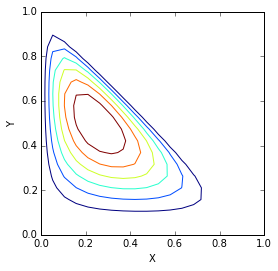

In [11]:
fig = figure()
ax = Axes3D(fig)
X, Y = meshgrid(linspace(0, 1, 20), linspace(0, 1, 20))
xlim(0, 1)
ylim(0, 1)
Z = 360*X*Y**2*(1-X-Y)
Z[X+Y>1]=0
axes().set_aspect('equal')
xlabel('X')
ylabel('Y')
contour(X, Y, Z)

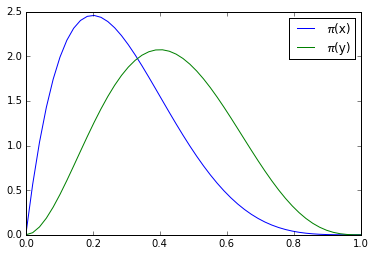

In [12]:
x = linspace(0, 1)
plot(x, 30*x*(1-x)**4, label=u'π(x)')
plot(x, 60*x**2*(1-x)**3, label=u'π(y)')
legend()

# 情報量

----

根元事象 $A_1,A_2,\ldots,A_n$ のそれぞれが確率 $p_1,p_2,\ldots,p_n$ で生じる離散的確率分布 $P$ に対して

$$\mathrm{H}(P)\stackrel{\mathrm{def}}{=} -\sum_{i=1}^np_i\log p_i $$

を分布 $P$ の**エントロピー(entropy)**と呼ぶ。任意の分布に対して常に $\mathrm{H}(P)\geq 0$ である。

連続的分布に対するエントロピーは

$$\mathrm{H}(\pi) = -\int \pi(\mathbf{x})\log\pi(\mathbf{x})\mathrm{d}\mathbf{x}$$

によって定義される。これは負の値も取りうる。
エントロピーの計算においては $0\log 0 = 0$ であるとする。

----

エントロピーとは分布 $P$ に対する試行・観察を行うことによって得ることが出来る平均的な情報量の大きさを表しています。

### 例

表の出る確率が $p$ であるコイン投げのエントロピーは

$$ \mathrm{H} = -p\log p -(1-p)\log(1-p) $$

となります。横軸に $p$ を取ってこれをプロットしてみると以下のようになります。

p = linspace(0.0001, 0.9999)
plot(p, -p*log(p)-(1-p)*log(1-p))

このグラフを見ると、$p=1$ の時エントロピーは $0$になっています。これはどういうことかと言うと $p=1$ ならば絶対に表が出るとあらかじめ分かっているので、試行を行った所で新しい情報は得られないという事です。$p=0$の時も同様です。$p=0.99$ の所では $\mathrm{H}=0.056$ となります。この時、表が出るか裏が出るかを完全に予測する事は出来ないので、実際に試行を行うといくらかの情報が得られます。しかし、どうせ99%の確率で表だという事は分かっているので得られる情報量は微小です。$p=0.5$ の所でエントロピーが最大になっていますが、この時は表と裏の出方は事前に全く予測出来ませんので、実際に試行を行うことによって得られる情報量は大きくなります。

次は確率 $p$ で表が出るコインを２回連続で振った場合に得られるエントロピーを求めてみると

$$\mathrm{H}' = -p^2\log p^2 - p(1-p)\log p(1-p) - (1-p)p\log (1-p)p - (1-p)^2\log (1-p)^2 = -2p\log p-2(1-p)\log (1-p)$$

つまり $\mathrm{H}'=2\mathrm{H}$ になっています。コインを一回振ると平均 $\mathrm{H}$ の情報量が得られるので、二回振れば平均 $2\mathrm{H}$ の情報量が得られるというわけです。$n$回振れば $n\mathrm{H}$ の情報量が得られます。

今の例から予想出来ると思いますが、結果が全く予想出来ない時つまり $p_1,p_2,\ldots,p_n$ が全て等しい時にエントロピーは最大となります。

----
【エントロピー最大の分布】

離散的分布 $P$ のエントロピーは $p_1=p_2=\cdots=p_n=1/n$ の時に最大となり $\mathrm{H}(P) = \log n$ である。

【証明】

$p_1+p_2+\cdots+p_n=1$ という条件下で
$$\mathrm{H}(P)= -\sum_{i=1}^np_i\log p_i$$
が最大となる条件を考える。ラグランジュの未定乗数 $\lambda$ を導入して

$$ F(p_1,\ldots,p_n,\lambda) = -\sum_{i=1}^np_i\log p_i - \lambda\left(\sum_{i=1}^n p_i - 1\right) $$

と置くと

$$ \frac{\partial F}{\partial p_i} = -\log p_i - 1 - \lambda,\quad \frac{\partial F}{\partial \lambda} = -\sum_{i=1}^np_i + 1$$

であるので、これらが全て $0$ となることが必要である。従って第一式より

$$ p_i = \exp(-1 - \lambda) $$

すなわち，$p_i$ は全て等しい事が必要である。 $p_1=p_2=\cdots=p_n=1/n$ の時に最大となることは明らか。(証明終)

----

エントロピーは生じる現象の予測が全く出来ない状態で最大になるため、現象の**無秩序さの度合い**を表していると考える事も出来ます。

----
２つの離散的な分布 $P,Q$ に対して

$$\mathrm{D}_{\mathrm{KL}}(P||Q)\stackrel{\mathrm{def}}{=} \sum_{i=1}^n p_i \log \frac{p_i}{q_i} $$

を分布 $P,Q$ の**カルバック・ライブラー情報量(Kullback-Leibler divergence)**と呼ぶ。

２つの連続的な分布 $p(\mathbf{x}),q(\mathbf{x})$ に対しては

$$\mathrm{D}_{\mathrm{KL}}(p||q) \stackrel{\mathrm{def}}{=}\int p(\mathbf{x})\log\frac{p(\mathbf{x})}{q(\mathbf{x})}\mathrm{d}\mathbf{x}$$

と定義する。

----

カルバック・ライブラー情報量はベイズ統計学において特に重要な意味を持ちます。事前分布 $q(\mathbf{x})$ が新しいデータ $I$ を得る事によって事後分布 $p(\mathbf{x})$ に変化した場合に $I$ から得られる情報量の平均を表しています。もっと分かりやすくいえばデータ $I$ の価値だと言えるでしょう。

### 例
あるコインを投げて表が出る確率 $\theta$ を推定したいとします。事前分布を $\pi(\theta) = 6\theta(1-\theta)\qquad(0\leq \theta \leq 1)$ としましょう。

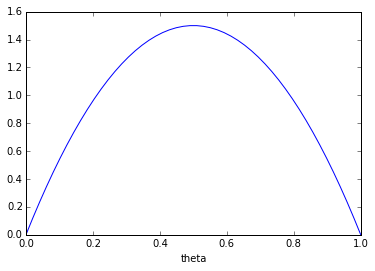

In [13]:
xlabel(u'theta')
x = linspace(0, 1)
plot(x, 6*x*(1-x))

この分布は表の出る確率 $\theta$ がどの値であるかについての信念を表しています。例えば、

$$ P(0.4\leq \theta \leq 0.6) = \int_{0.4}^{0.6}6\theta(1-\theta)\mathrm{d}\theta = 0.2 $$

なので、この人は20%の確率で表が出る確率は $0.4\leq \theta \leq 0.6$ だろうと信じています。

さて、この「コインを4回投げたら全て表が出た」というデータ $I$ が新たに得られたとしましょう。ベイズの定理より、事後分布は

$$ \pi(\theta | I) \propto P(I|\theta)\pi(\theta) = \theta^4\times 6\theta(1-\theta) \propto \theta^5(1-\theta) $$

になります。比例係数は

$$\int_0^1 \theta^5(1-\theta)\mathrm{d}\theta = \frac{1}{42}$$

なので、$42$ つまり

$$ \pi(\theta | I) = 42\theta^5(1-\theta) $$

です。事前分布 $\pi(\theta)$ と事後分布 $\pi(\theta|I)$ をプロットすると下のようになります。4回連続で表が出たという結果を受けて、この人は「もしかして表の方が出やすいコインなんじゃないか？」と信念を改めたというわけです。

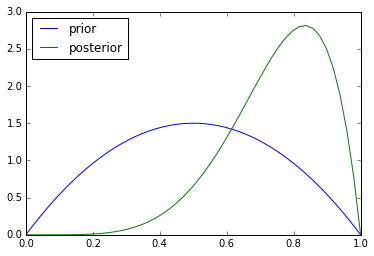

In [14]:
x = linspace(0, 1)
plot(x, 6*x*(1-x), label='prior')
plot(x, 42*x**5*(1-x), label='posterior')
legend(loc=2)

このデータ $I$ のKL情報量は以下のようになります。

$$ \mathrm{D}_{\mathrm{KL}}(\pi(\theta|I)||\pi(\theta)) = \int_0^1 \pi(\theta|I)\log \frac{\pi(\theta|I)}{\pi(\theta)}\mathrm{d}\theta = \int_0^1 42\theta^5(1-\theta)\log\frac{42\theta^5(1-\theta)}{6\theta(1-\theta)}\mathrm{d}\theta = 42\int_0^1\theta^5(1-\theta)\log (7\theta^4)\mathrm{d}\theta = 0.67$$

別の場合を考えてみましょう。事前分布は同じとして「５回コインを投げたら表、表、裏、表、裏の順に出た」というデータ $J$ のKL情報量を測ってみましょう。先ほどと同様にして

$$\pi(\theta|J)\propto \theta^3(1-\theta)^2\times 6\theta(1-\theta) \propto \theta^4(1-\theta)^3$$

及び

$$ \int_0^1 \theta^4(1-\theta)^3\mathrm{d}\theta = \frac{1}{280} $$

より

$$\pi(\theta|J) = 280\theta^4(1-\theta)^3$$

となります。図示してみると以下のようになります。

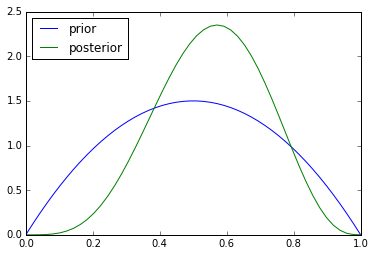

In [17]:
x = linspace(0, 1)
plot(x, 6*x*(1-x), label='prior')
plot(x, 280*x**4*(1-x)**3, label='posterior')
legend(loc=2)

KL情報量は次のように計算されます。

$$\mathrm{D}_{\mathrm{KL}}(\pi(\theta|J)||\pi(\theta)) = \int_0^1280\theta^4(1-\theta)^3\log\frac{280\theta^4(1-\theta)^3}{6\theta(1-\theta)}\mathrm{d}\theta = 0.17$$

先ほどの0.67よりも大分小さい値となっていますが、これは次のように考える事が出来ます。

1. 「4回連続表」というデータ $I$ は予想外だったので、信念を大きく改訂する必要があった。
2. 「表、表、裏、表、裏」というデータ $J$ はよくありそうな予想できる結果なので、信念はあまり大きく改訂されなかった